### NETFLIX

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
#Read the file
df = pd.read_csv('C:/Users/KIRAN BAVOR/Downloads/Netflix_Dataset.csv')

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7789, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [7]:
# Data Cleaning

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Handle missing values
# For columns with high missing values, we'll fill with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')

# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from release date for analysis
df['Release_Year'] = df['Release_Date'].dt.year

# Clean the Duration column and extract numerical values
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)

# For TV Shows: Duration represents number of seasons
# For Movies: Duration represents minutes
df['Duration_Type'] = df['Duration'].apply(lambda x: 'Seasons' if 'Season' in str(x) else 'Minutes')

print("\nData after cleaning:")
print(f"Dataset shape: {df.shape}")
print(f"Years range: {df['Release_Year'].min()} to {df['Release_Year'].max()}")

Missing Values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Number of duplicate rows: 2

Data after cleaning:
Dataset shape: (7789, 14)
Years range: 2008.0 to 2021.0


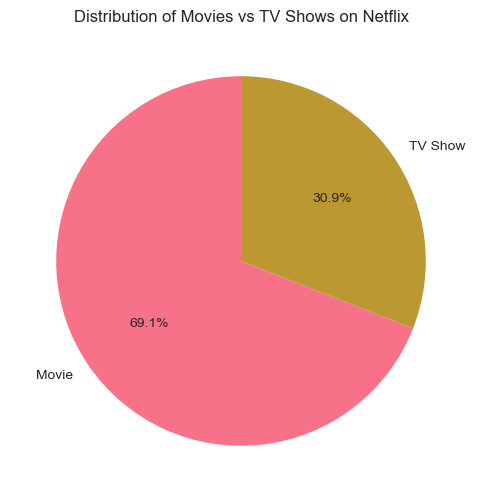

Content Type Distribution:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [9]:
# 1. Distribution of Movies vs TV Shows
plt.figure(figsize=(10, 6))
type_counts = df['Category'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.show()

print("Content Type Distribution:")
print(type_counts)

<Figure size 1500x800 with 0 Axes>

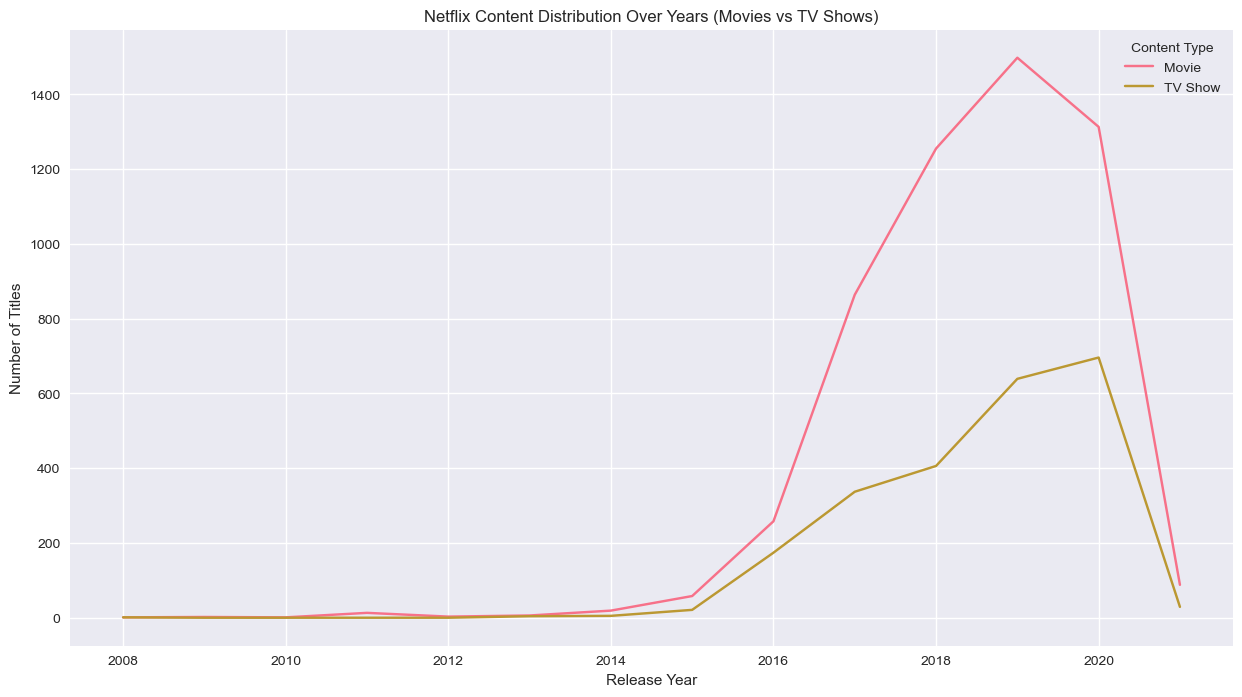


Yearly Content Distribution:
Category       Movie  TV Show
Release_Year                 
2012.0           3.0      0.0
2013.0           6.0      4.0
2014.0          19.0      5.0
2015.0          58.0     21.0
2016.0         258.0    174.0
2017.0         864.0    337.0
2018.0        1255.0    406.0
2019.0        1498.0    639.0
2020.0        1313.0    696.0
2021.0          88.0     29.0


In [10]:
# 2. Content distribution over years
plt.figure(figsize=(15, 8))

# Group by year and type
yearly_content = df.groupby(['Release_Year', 'Category']).size().unstack().fillna(0)

# Plot
yearly_content.plot(kind='line', figsize=(15, 8))
plt.title('Netflix Content Distribution Over Years (Movies vs TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

print("\nYearly Content Distribution:")
print(yearly_content.tail(10))  # Last 10 years

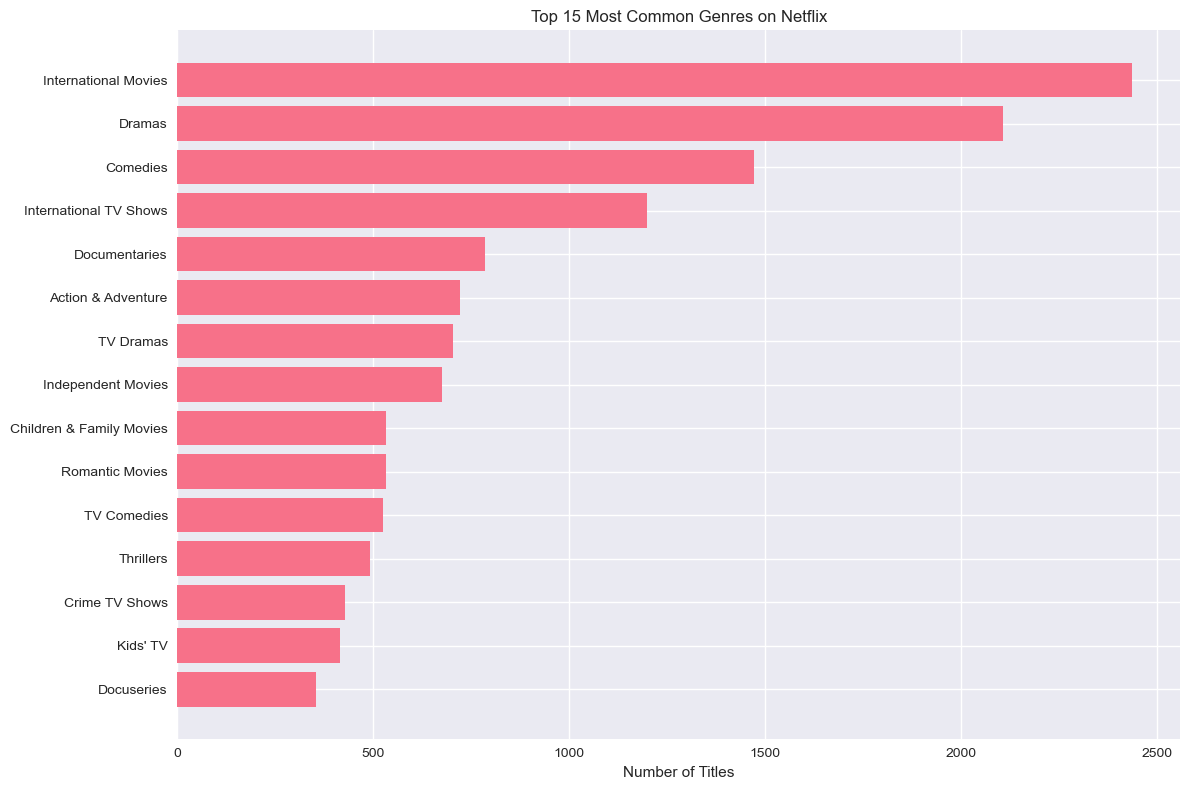

Top 15 Genres:
International Movies: 2437
Dramas: 2108
Comedies: 1472
International TV Shows: 1199
Documentaries: 786
Action & Adventure: 721
TV Dramas: 704
Independent Movies: 675
Children & Family Movies: 532
Romantic Movies: 531
TV Comedies: 525
Thrillers: 492
Crime TV Shows: 427
Kids' TV: 414
Docuseries: 353


In [11]:
# 3. Most common genres analysis
# Split genres (they are separated by commas)
from collections import Counter

# Extract all genres
all_genres = []
for genres in df['Type'].dropna():
    genre_list = [genre.strip() for genre in genres.split(',')]
    all_genres.extend(genre_list)

# Get top 15 genres
genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(15))

plt.figure(figsize=(12, 8))
plt.barh(list(top_genres.keys()), list(top_genres.values()))
plt.title('Top 15 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 15 Genres:")
for genre, count in top_genres.items():
    print(f"{genre}: {count}")

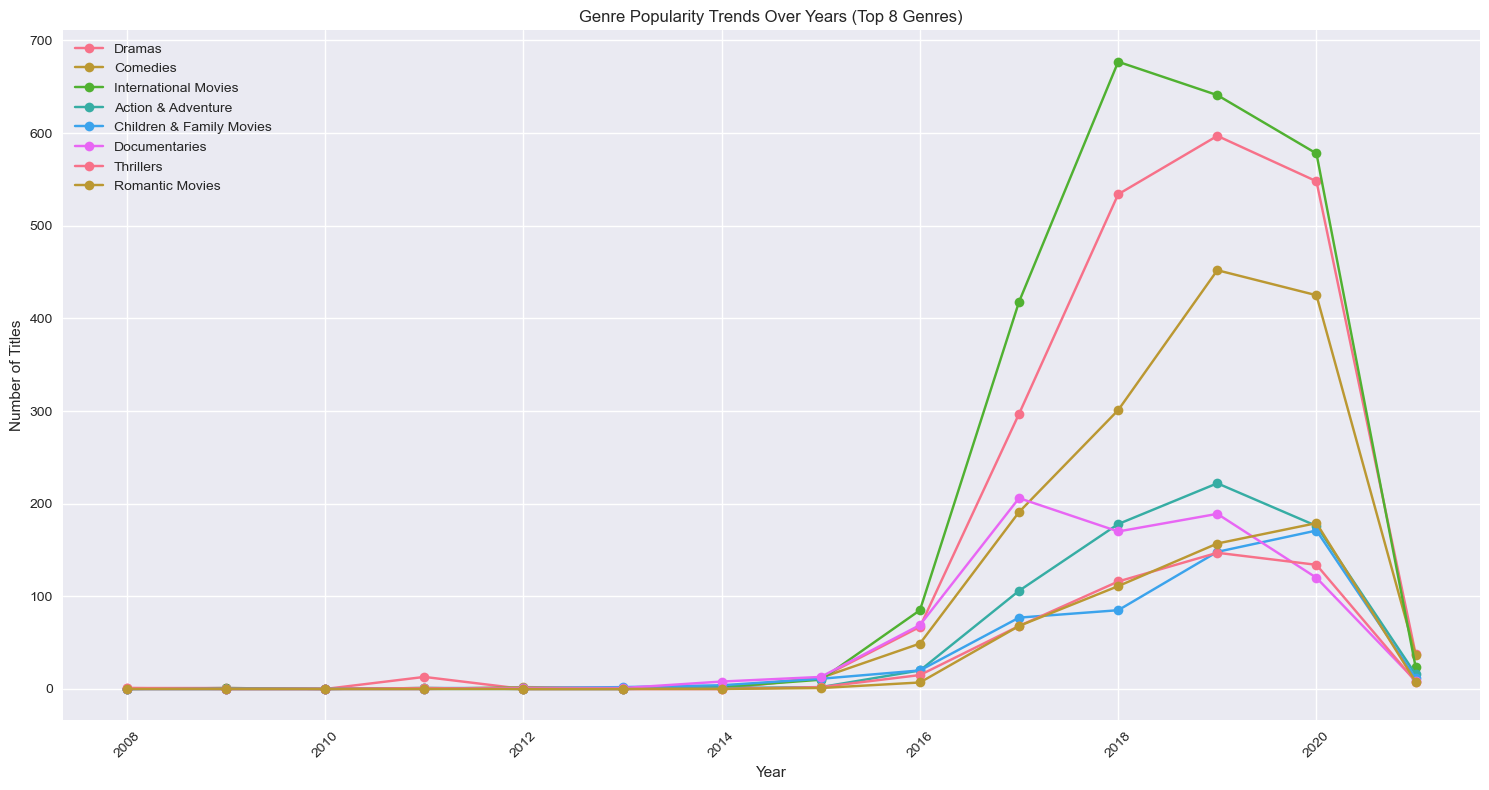

In [12]:
# 4. Genre popularity over years
# Create a dataframe for genre trends
genre_trends = pd.DataFrame()

for year in range(2008, 2022):
    year_data = df[df['Release_Year'] == year]
    year_genres = []
    for genres in year_data['Type'].dropna():
        genre_list = [genre.strip() for genre in genres.split(',')]
        year_genres.extend(genre_list)
    
    genre_counts = Counter(year_genres)
    for genre, count in genre_counts.items():
        genre_trends.loc[year, genre] = count

# Fill NaN with 0
genre_trends = genre_trends.fillna(0)

# Select top 8 genres for trend analysis
top_8_genres = list(genre_counts.most_common(8))
top_genre_names = [genre for genre, count in top_8_genres]

plt.figure(figsize=(15, 8))
for genre in top_genre_names:
    if genre in genre_trends.columns:
        plt.plot(genre_trends.index, genre_trends[genre], label=genre, marker='o')

plt.title('Genre Popularity Trends Over Years (Top 8 Genres)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

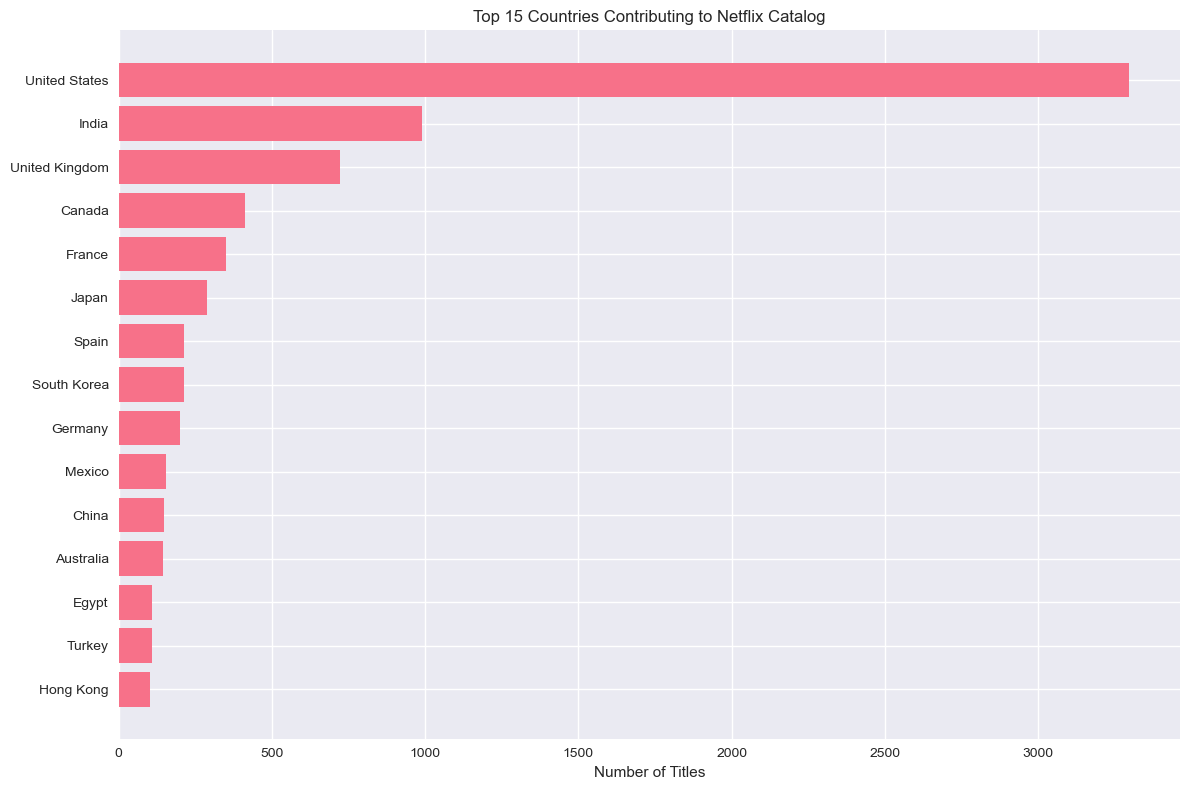

Top 15 Countries:
United States: 3298
India: 990
United Kingdom: 723
Canada: 412
France: 349
Japan: 287
Spain: 215
South Korea: 212
Germany: 199
Mexico: 154
China: 147
Australia: 144
Egypt: 110
Turkey: 108
Hong Kong: 102


In [13]:
# 5. Country-wise contributions
# Split countries and analyze
all_countries = []
for countries in df['Country'].dropna():
    if countries != 'Unknown':
        country_list = [country.strip() for country in countries.split(',')]
        all_countries.extend(country_list)

# Get top 15 countries
country_counts = Counter(all_countries)
top_countries = dict(country_counts.most_common(15))

plt.figure(figsize=(12, 8))
plt.barh(list(top_countries.keys()), list(top_countries.values()))
plt.title('Top 15 Countries Contributing to Netflix Catalog')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 15 Countries:")
for country, count in top_countries.items():
    print(f"{country}: {count}")

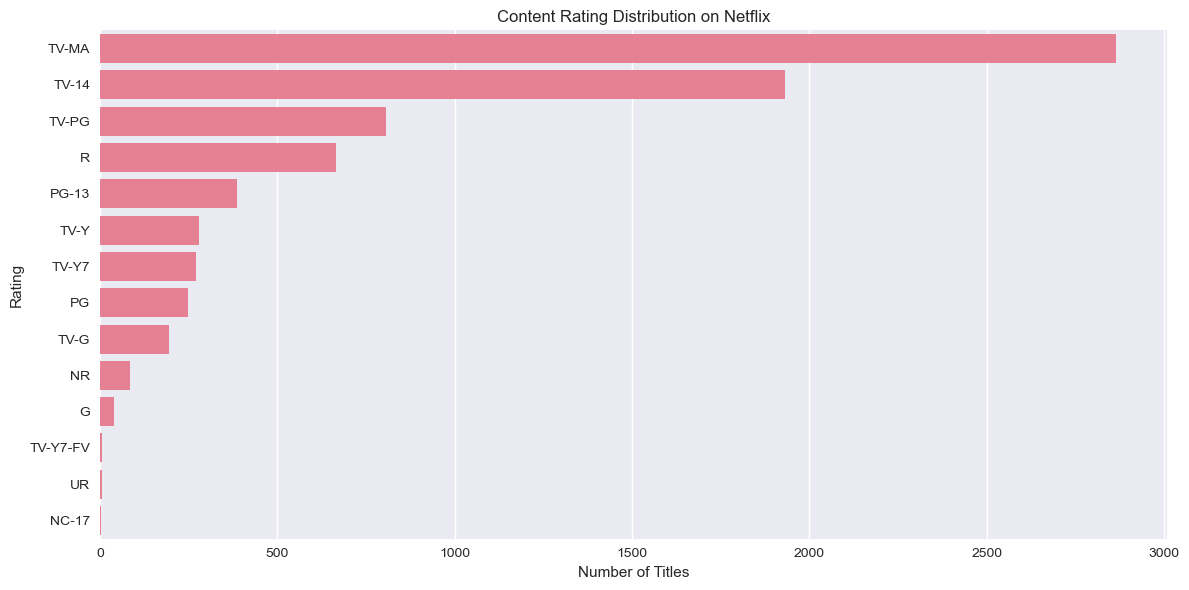

Rating Distribution:
Rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


In [14]:
# 6. Rating distribution
plt.figure(figsize=(12, 6))
rating_counts = df['Rating'].value_counts()
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Content Rating Distribution on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

print("Rating Distribution:")
print(rating_counts)

<Figure size 1200x600 with 0 Axes>

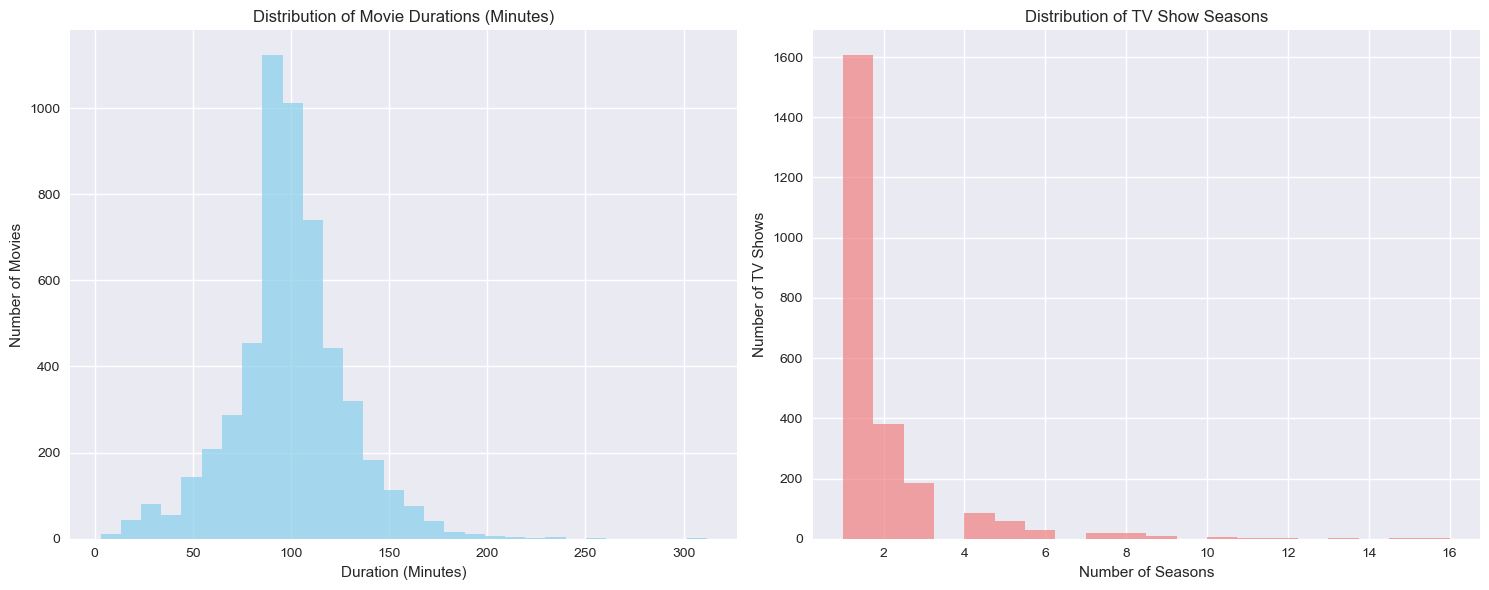

Average Movie Duration: 99.3 minutes
Average TV Show Seasons: 1.8 seasons


In [15]:
# 7. Duration analysis by content type
plt.figure(figsize=(12, 6))

# Movies duration in minutes
movies_data = df[df['Category'] == 'Movie'].copy()
movies_data['Duration_Minutes'] = movies_data['Duration_Numeric']

# TV Shows number of seasons
tv_data = df[df['Category'] == 'TV Show'].copy()
tv_data['Seasons'] = tv_data['Duration_Numeric']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Movies duration distribution
ax1.hist(movies_data['Duration_Minutes'].dropna(), bins=30, alpha=0.7, color='skyblue')
ax1.set_title('Distribution of Movie Durations (Minutes)')
ax1.set_xlabel('Duration (Minutes)')
ax1.set_ylabel('Number of Movies')

# TV Shows seasons distribution
ax2.hist(tv_data['Seasons'].dropna(), bins=20, alpha=0.7, color='lightcoral')
ax2.set_title('Distribution of TV Show Seasons')
ax2.set_xlabel('Number of Seasons')
ax2.set_ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()

print(f"Average Movie Duration: {movies_data['Duration_Minutes'].mean():.1f} minutes")
print(f"Average TV Show Seasons: {tv_data['Seasons'].mean():.1f} seasons")

In [16]:
# Strategic Insights and Recommendations

print("="*60)
print("STRATEGIC INSIGHTS AND RECOMMENDATIONS")
print("="*60)

# Insight 1: Content Type Evolution
recent_years = df[df['Release_Year'] >= 2015]
recent_type_dist = recent_years['Category'].value_counts(normalize=True) * 100

print(f"\n1. CONTENT TYPE EVOLUTION (2015-2021):")
print(f"   Movies: {recent_type_dist.get('Movie', 0):.1f}%")
print(f"   TV Shows: {recent_type_dist.get('TV Show', 0):.1f}%")

# Insight 2: Top Genres
print(f"\n2. TOP 5 GENRES:")
for i, (genre, count) in enumerate(genre_counts.most_common(5), 1):
    print(f"   {i}. {genre}: {count} titles")

# Insight 3: Geographic Distribution
print(f"\n3. GEOGRAPHIC DISTRIBUTION:")
print(f"   United States leads with {top_countries.get('United States', 0)} titles")
print(f"   India follows with {top_countries.get('India', 0)} titles")
print(f"   United Kingdom: {top_countries.get('United Kingdom', 0)} titles")

# Insight 4: Growth Trends
growth_2018_2021 = yearly_content.loc[2021] - yearly_content.loc[2018]
print(f"\n4. GROWTH TRENDS (2018-2021):")
print(f"   Movie growth: {growth_2018_2021.get('Movie', 0):.0f} titles")
print(f"   TV Show growth: {growth_2018_2021.get('TV Show', 0):.0f} titles")

# Recommendations
print(f"\n5. STRATEGIC RECOMMENDATIONS:")
print(f"   • Focus on International TV Shows and Dramas (top genres)")
print(f"   • Expand content from underrepresented countries")
print(f"   • Balance Movie vs TV Show production based on audience preference")
print(f"   • Invest in popular genres while exploring niche categories")
print(f"   • Consider regional preferences for global expansion")

STRATEGIC INSIGHTS AND RECOMMENDATIONS

1. CONTENT TYPE EVOLUTION (2015-2021):
   Movies: 69.9%
   TV Shows: 30.1%

2. TOP 5 GENRES:
   1. Dramas: 38 titles
   2. Comedies: 37 titles
   3. International Movies: 24 titles
   4. Action & Adventure: 16 titles
   5. Children & Family Movies: 12 titles

3. GEOGRAPHIC DISTRIBUTION:
   United States leads with 3298 titles
   India follows with 990 titles
   United Kingdom: 723 titles

4. GROWTH TRENDS (2018-2021):
   Movie growth: -1167 titles
   TV Show growth: -377 titles

5. STRATEGIC RECOMMENDATIONS:
   • Focus on International TV Shows and Dramas (top genres)
   • Expand content from underrepresented countries
   • Balance Movie vs TV Show production based on audience preference
   • Invest in popular genres while exploring niche categories
   • Consider regional preferences for global expansion


Summary of the Result


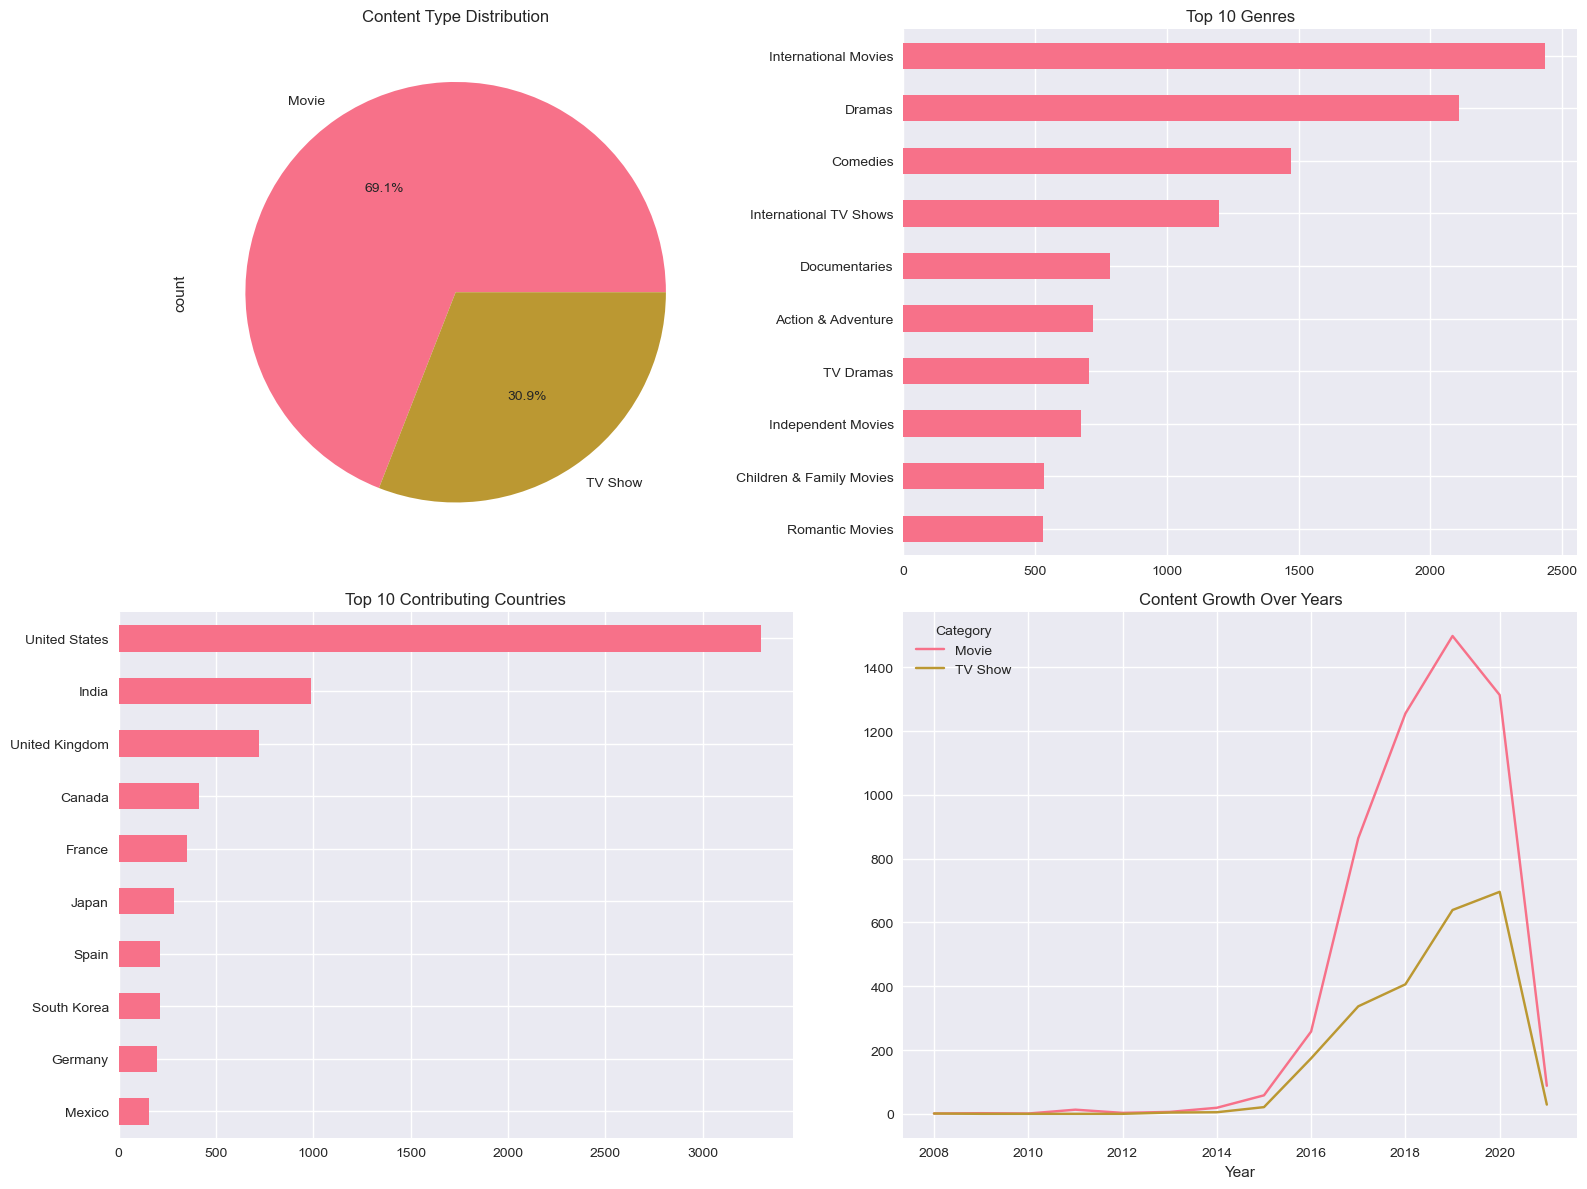

In [19]:
# Final Summary Visualization
print("Summary of the Result")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Content Type Distribution
df['Category'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Content Type Distribution')

# Plot 2: Top 10 Genres
pd.Series(top_genres).head(10).plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title('Top 10 Genres')
axes[0,1].invert_yaxis()

# Plot 3: Top 10 Countries
pd.Series(top_countries).head(10).plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title('Top 10 Contributing Countries')
axes[1,0].invert_yaxis()

# Plot 4: Yearly Growth
yearly_content[['Movie', 'TV Show']].plot(ax=axes[1,1])
axes[1,1].set_title('Content Growth Over Years')
axes[1,1].set_xlabel('Year')

plt.tight_layout()
plt.show()